#### Обработка данных

In [1]:
import pandas as pd
import numpy as np
import math as m

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data1 = pd.read_csv('data/experiment1.csv') # Считываем данные
data2 = pd.read_csv('data/experiment2.csv')
data3 = pd.read_csv('data/experiment3.csv')
data4 = pd.read_csv('data/experiment4.csv')

1) 

In [3]:
data1['R_sigma'] = data1['R'] + 10.3
data1['err_R_sigma'] = 0.01*data1['R_sigma']

In [4]:
data1['x/x0'] = data1['x']/data1['x0']
data1['e_err_x/x0'] = 0.3/data1['x'] + 0.3/data1['x0']

In [5]:
data1['psi'] = 2*arcsin(data1['x/x0'])
data1['err_psi'] = 2*np.reciprocal(np.sqrt(1 - data1['x/x0']**2))*data1['e_err_x/x0']*data1['x/x0']

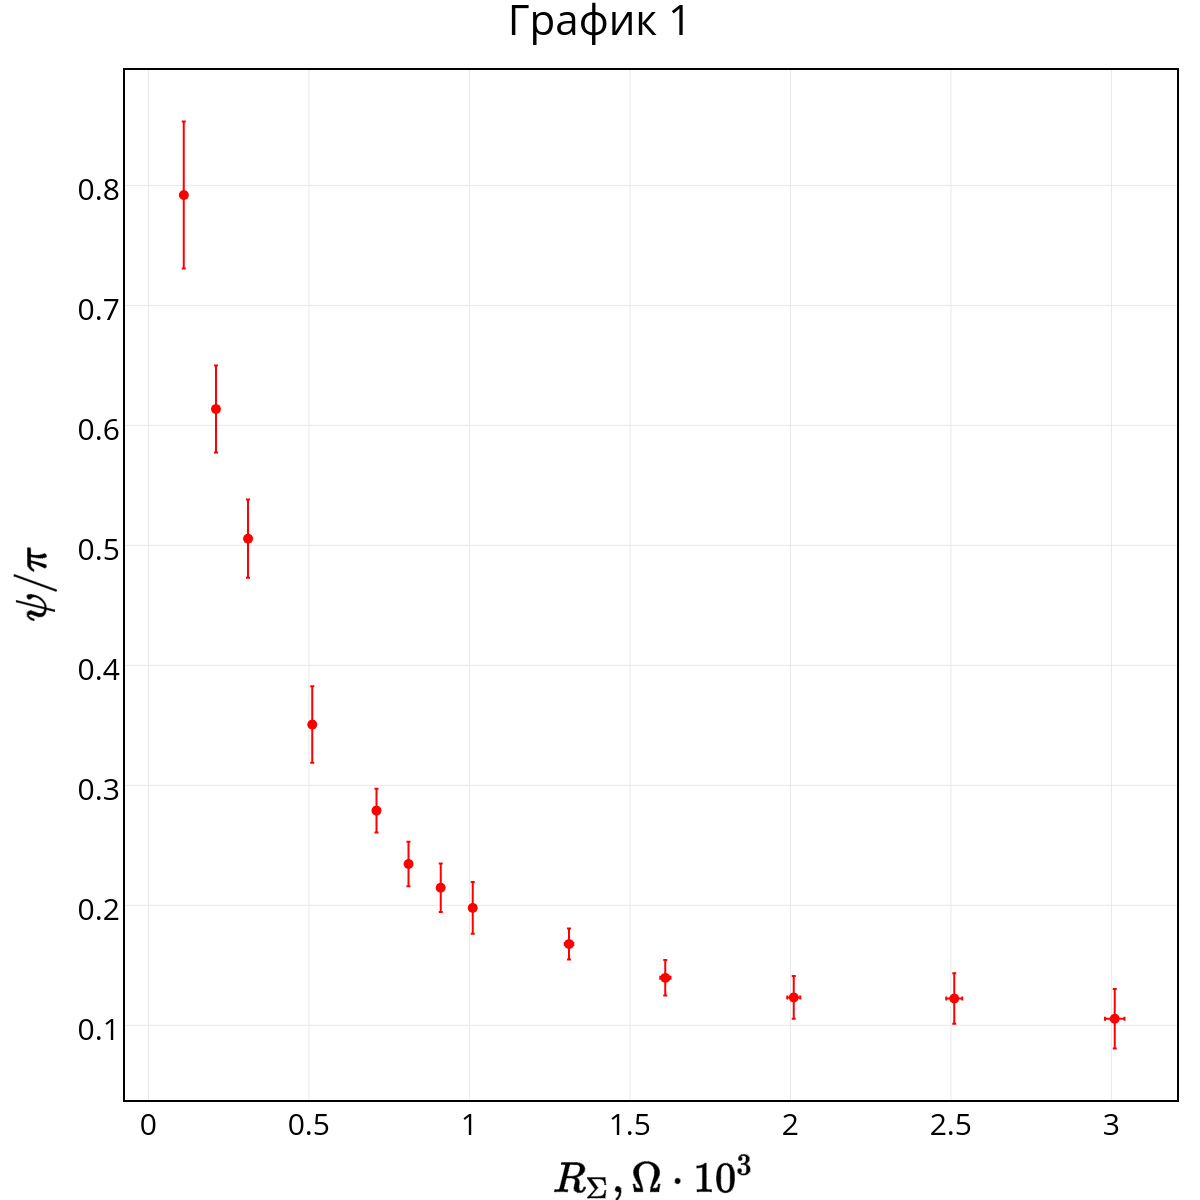

In [6]:
trace1 = go.Scatter(
    y = data1['psi']/pi,
    x = data1['R_sigma']/1000,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = data1['err_psi']/pi,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = data1['err_R_sigma']/1000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    title = "График 1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$R_{\Sigma}, \Omega \cdot 10^{3}$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\psi / \pi $',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [7]:
data1['tg'] = np.tan(data1['psi']/2) 
data1['err_tg'] = 0.5*data1['err_psi']/(cos(data1['psi']/2))**2

data1['f'] = 1/(2*np.pi*1000*0.5*10**(-6)*data1['R_sigma'])
data1['err_f'] = (0.001 + 0.01)*data1['f']

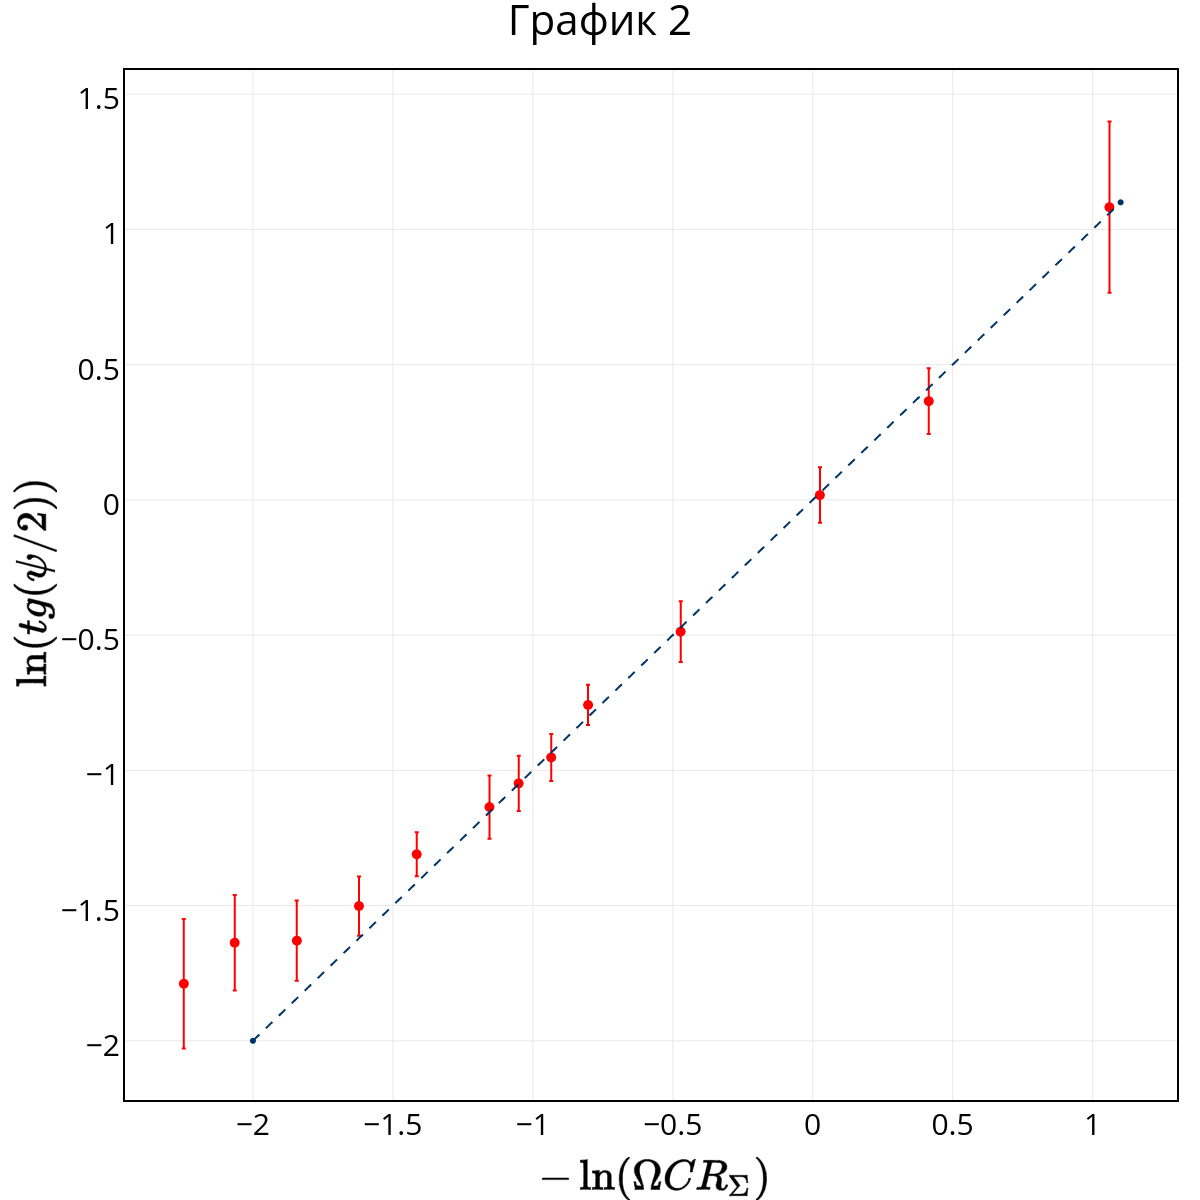

In [14]:
trace1 = go.Scatter(
    y = np.log(data1['tg']),
    x = np.log(data1['f']),
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = np.reciprocal(data1['tg'])*data1['err_tg'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = np.reciprocal(data1['f'])*data1['err_f'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace2 = go.Scatter(
    y = [-2, 1.1],
    x = [-2, 1.1],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)

trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    title = "График 2",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$-\ln(\Omega C R_{\Sigma})$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\ln (tg(\psi /2))$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

2)

In [11]:
data2['R_sigma'] = data2['R'] + 10.3 + 55.7
data2['err_R_sigma'] = 0.01*data2['R_sigma']

In [12]:
data2['x/x0'] = data2['x']/data2['x0']
data2['e_err_x/x0'] = 0.3/data2['x'] + 0.3/data2['x0']

data2['psi'] = 2*arcsin(data2['x/x0'])
data2['err_psi'] = 2*np.reciprocal(np.sqrt(1 - data2['x/x0']**2))*data2['e_err_x/x0']*data2['x/x0']

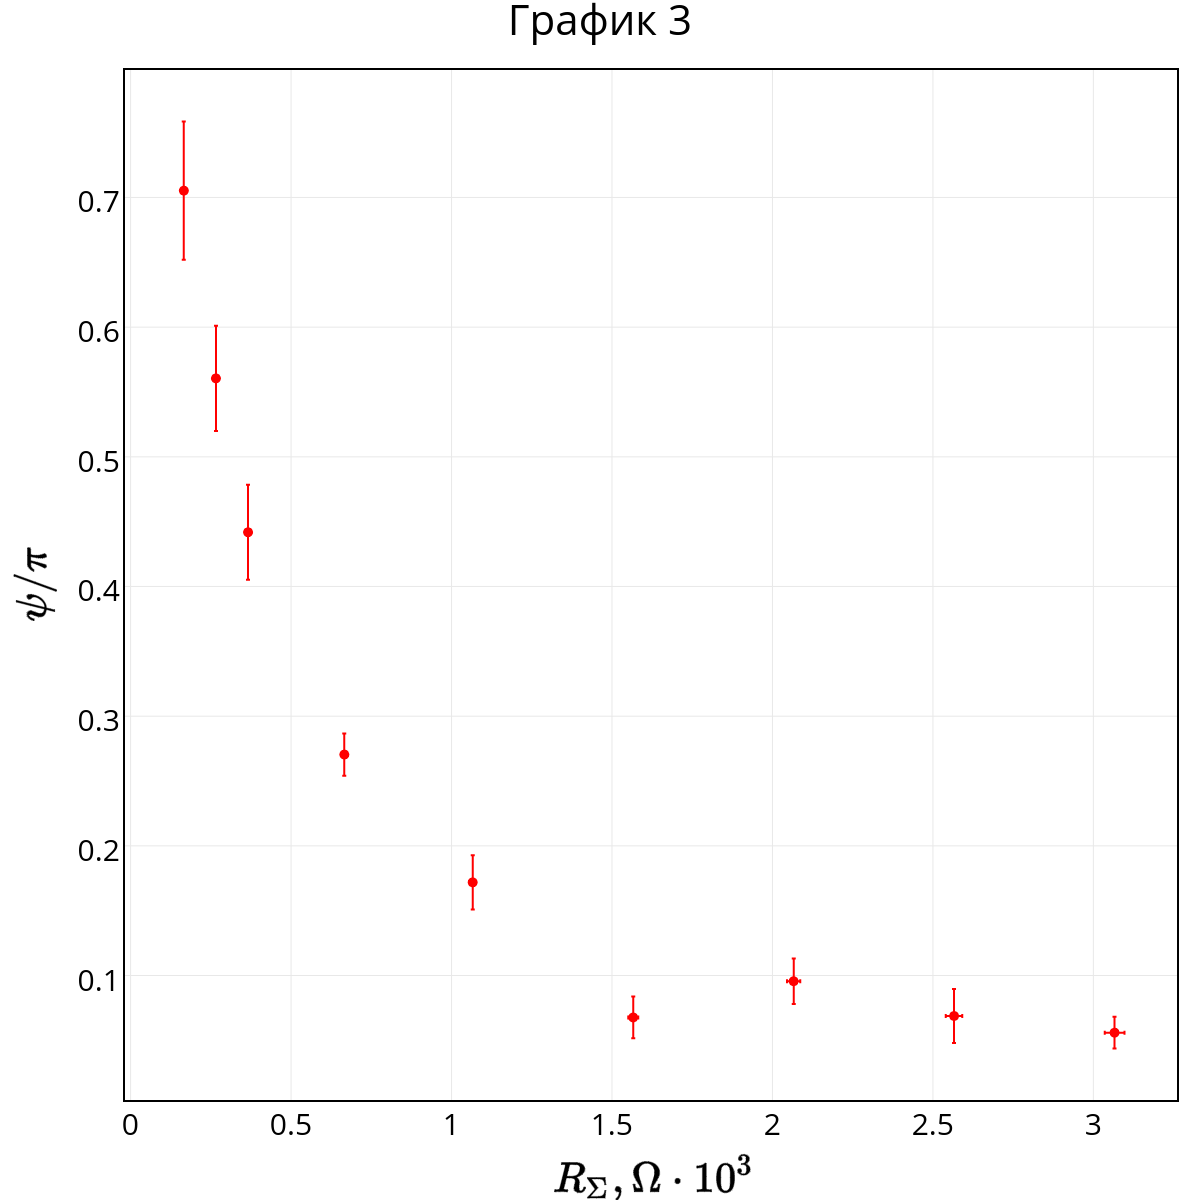

In [15]:
trace1 = go.Scatter(
    y = data2['psi']/pi,
    x = data2['R_sigma']/1000,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = data2['err_psi']/pi,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = data2['err_R_sigma']/1000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    title = "График 3",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$R_{\Sigma}, \Omega \cdot 10^{3}$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\psi / \pi$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

In [16]:
data2['tg'] = np.tan(data2['psi']/2) 
data2['err_tg'] = 0.5*data2['err_psi']/(cos(data2['psi']/2))**2

data2['f'] = 2*np.pi*1000*50*10**(-3)/(data2['R_sigma'])
data2['err_f'] = (0.001 + 0.01)*data2['f']

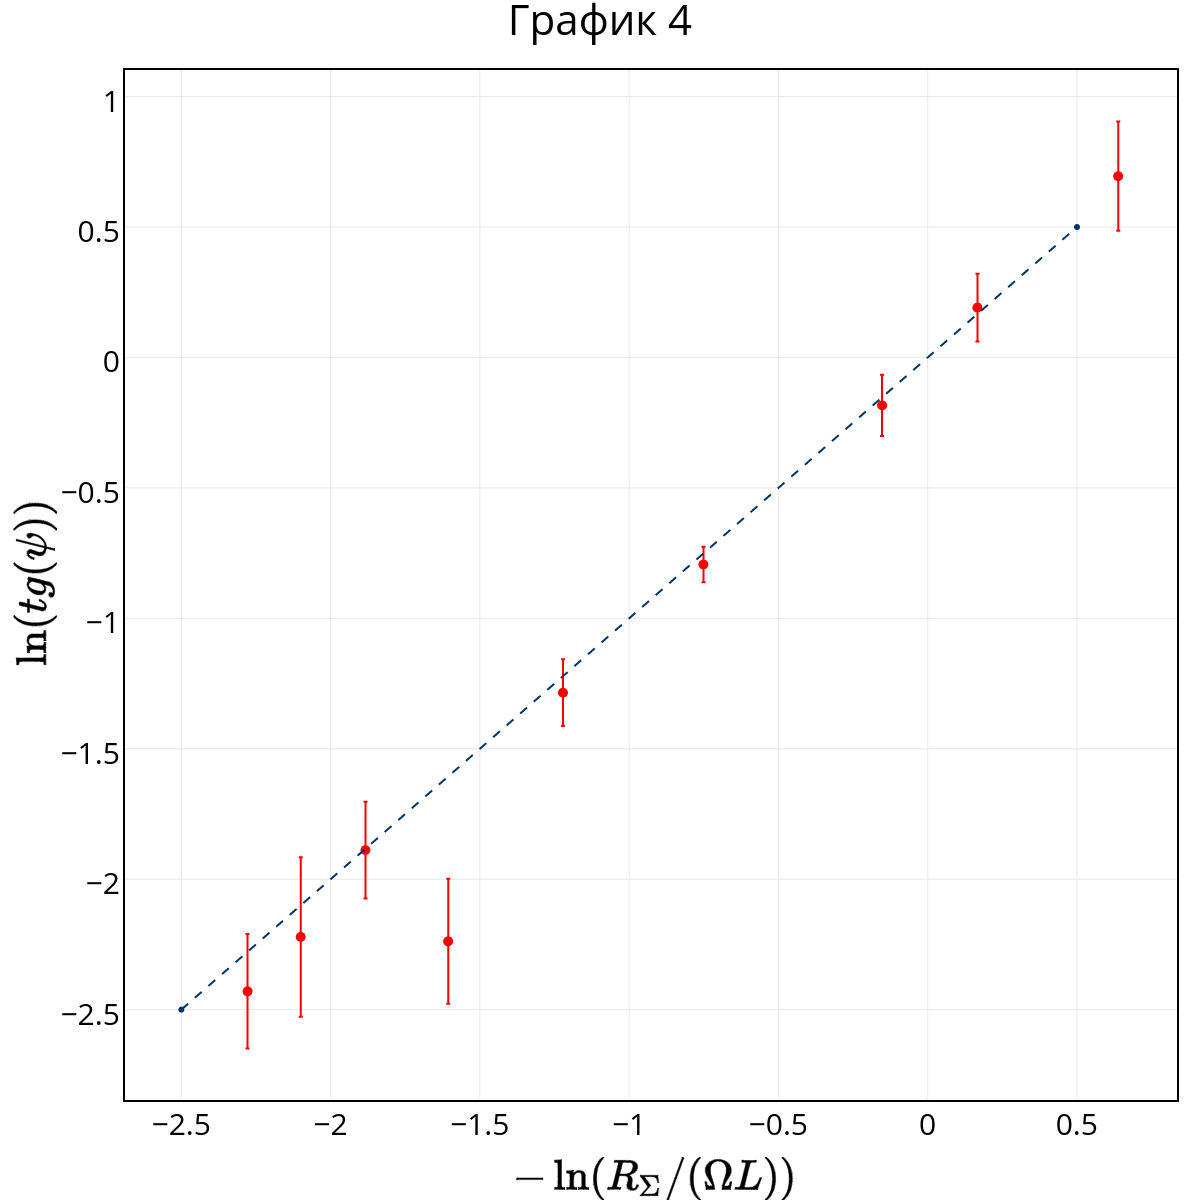

In [17]:
trace1 = go.Scatter(
    y = np.log(data2['tg']),
    x = np.log(data2['f']),
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = np.reciprocal(data2['tg'])*data2['err_tg'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = np.reciprocal(data2['f'])*data2['err_f'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace2 = go.Scatter(
    y = [-2.5, 0.5],
    x = [-2.5, 0.5],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)

trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    title = "График 4",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$-\ln(R_{\Sigma}/(\Omega L))$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\ln (tg(\psi))$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot4.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot4.png", width=500)

3)

In [18]:
data2

,R,x,x0,R_sigma,err_R_sigma,x/x0,e_err_x/x0,psi,err_psi,tg,err_tg,f,err_f
0,100,13.6,15.2,166,1.66,0.894737,0.041796,2.215683,0.167473,2.003469,0.419845,1.892526,0.020818
1,200,10.1,13.1,266,2.66,0.770992,0.052604,1.760796,0.127369,1.210645,0.157024,1.181050,0.012992
2,300,7.1,11.1,366,3.66,0.639640,0.069281,1.388059,0.115301,0.832133,0.097571,0.858359,0.009442
3,600,7.5,18.2,666,6.66,0.412088,0.056484,0.849489,0.051092,0.452275,0.030772,0.471711,0.005189
4,1000,3.2,12.0,1066,10.66,0.266667,0.118750,0.539866,0.065713,0.276686,0.035372,0.294709,0.003242
5,1500,1.4,13.2,1566,15.66,0.106061,0.237013,0.212521,0.050561,0.106662,0.025568,0.200613,0.002207
6,2000,1.9,12.7,2066,20.66,0.149606,0.181517,0.300340,0.054930,0.151309,0.028094,0.152062,0.001673
7,2500,1.1,10.2,2566,25.66,0.107843,0.302139,0.216107,0.065550,0.108476,0.033160,0.122432,0.001347
8,3000,1.5,17.1,3066,30.66,0.087719,0.217544,0.175664,0.038313,0.088059,0.019305,0.102466,0.001127


In [19]:
data3['x/x0'] = data3['x']/data3['x0']
data3['e_err_x/x0'] = 0.3/data3['x'] + 0.3/data3['x0']

data3['psi'] = 2*arcsin(data3['x/x0'])
data3['err_psi'] = 2*np.reciprocal(np.sqrt(1 - data3['x/x0']**2))*data3['e_err_x/x0']*data3['x/x0']

data3['nu_norm'] = data3['nu']/1000


data4['x/x0'] = data4['x']/data4['x0']
data4['e_err_x/x0'] = 0.3/data4['x'] + 0.3/data4['x0']

data4['psi'] = 2*arcsin(data4['x/x0'])
data4['err_psi'] = 2*np.reciprocal(np.sqrt(1 - data4['x/x0']**2))*data4['e_err_x/x0']*data4['x/x0']

data4['nu_norm'] = data4['nu']/1000

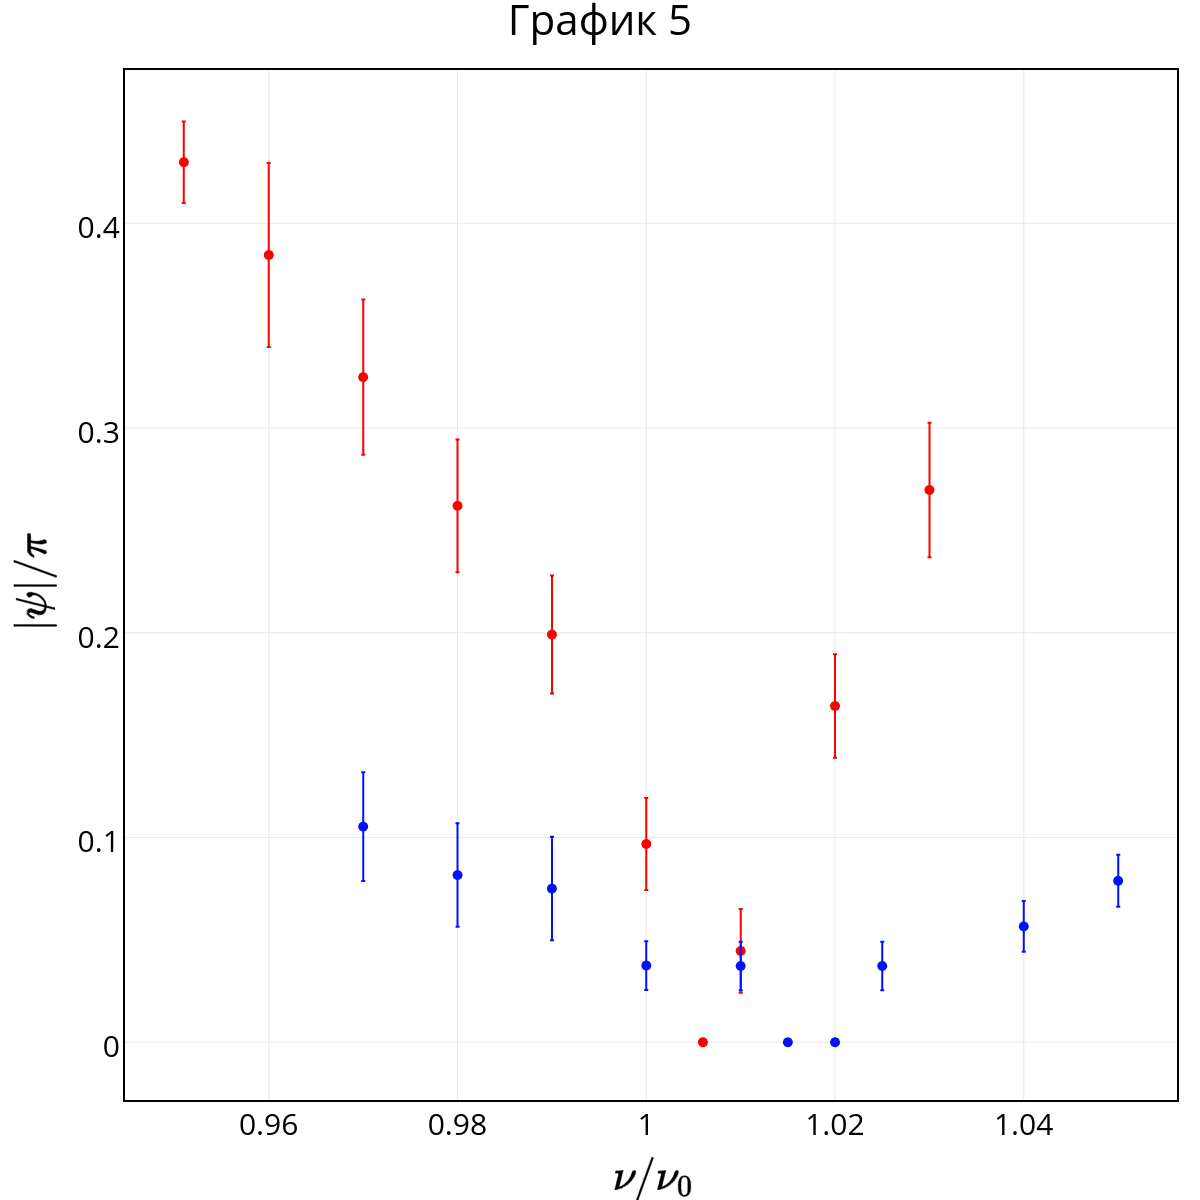

In [20]:
trace1 = go.Scatter(
    y = data3['psi']/pi,
    x = data3['nu_norm'],
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = data3['err_psi']/pi,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace2 = go.Scatter(
    y = data4['psi']/pi,
    x = data4['nu_norm'],
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = data4['err_psi']/pi,
        visible = True,
        color = '#0011ff',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#0011ff'
    ),
)

trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    title = "График 5",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$ ν / ν_0$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$|\psi| / \pi$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot5.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot5.png", width=500)

In [22]:
Y = np.reshape(np.array(cos(data3['psi'])), (1, len(np.array(cos(data3['psi'])))))
X = np.reshape(np.array(data3['nu_norm']), (1, len(np.array(data3['nu_norm']))))
def f(x, b, c):
    return 1.0/sqrt(1 + (b**2)*(2*(x-c)/c)**2)
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print (parameters_opt_1)
print (np.sqrt(np.diag(parameters_cov_1)))

[ 24.45903761   1.00645168]
[  1.63008843e+00   1.50589466e-03]


In [23]:
Y = np.reshape(np.array(cos(data4['psi'])), (1, len(np.array(cos(data4['psi'])))))
X = np.reshape(np.array(data4['nu_norm']), (1, len(np.array(data4['nu_norm']))))
def f(x, b, c):
    return 1.0/sqrt(1 + (b**2)*(2*(x-c)/c)**2)
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print (parameters_opt_1)
print (np.sqrt(np.diag(parameters_cov_1)))

[ 3.81498683  1.01657736]
[ 0.12314619  0.00118625]


In [24]:
fit_plot_x = np.linspace(0.95, 1.035, 100)
fit_plot_y = 1.0/sqrt(1 + (24.45**2)*(2*(fit_plot_x-1.006)/1.006)**2)

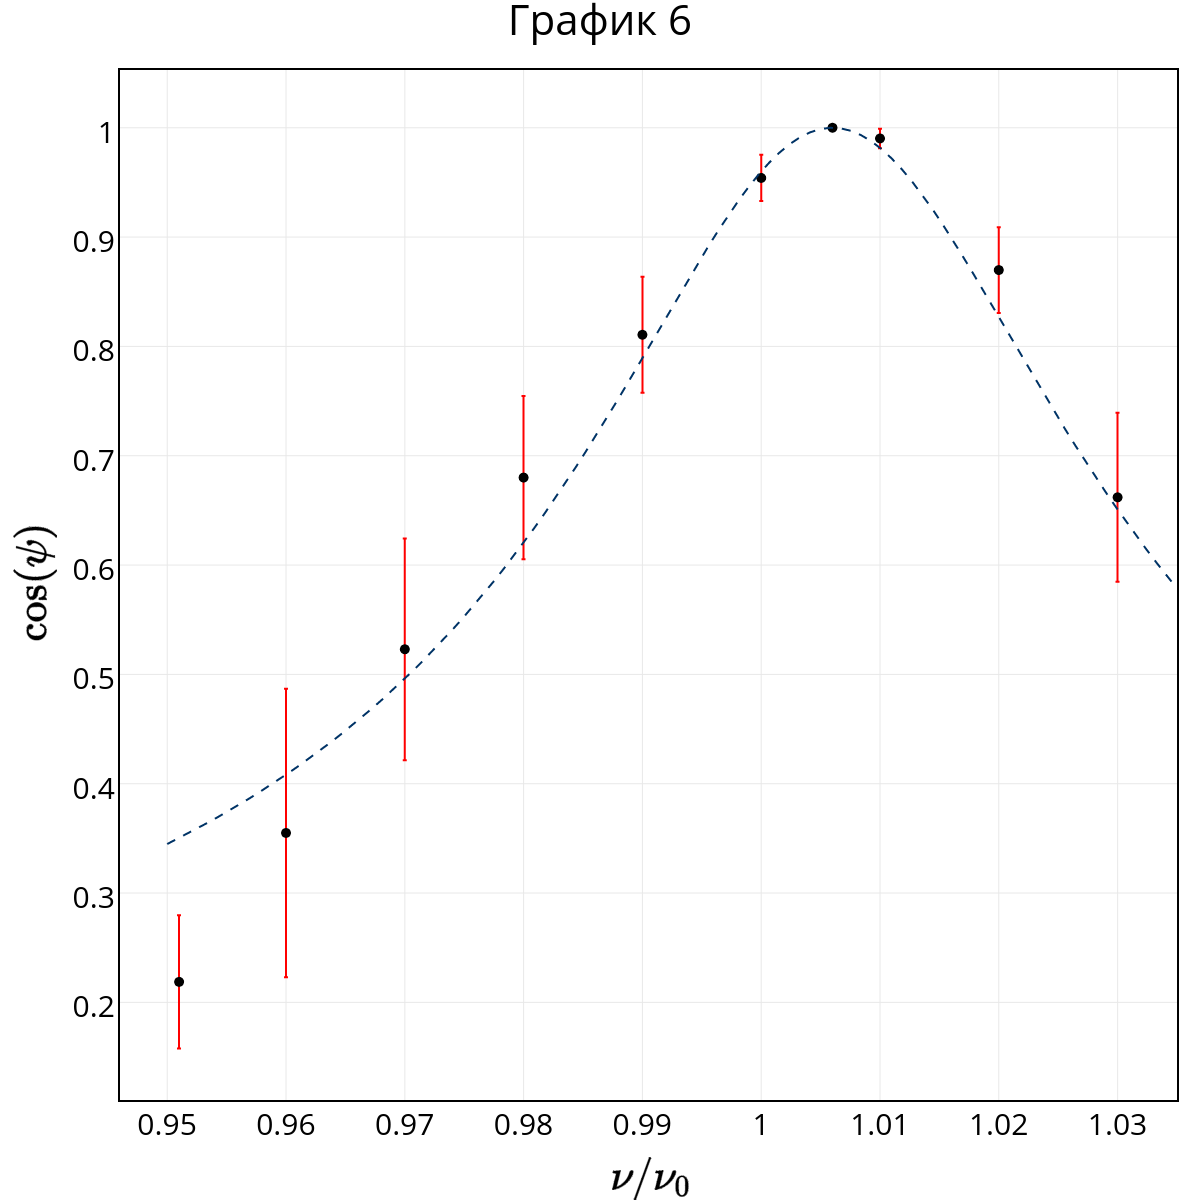

In [28]:
trace1 = go.Scatter(
    y = cos(data3['psi']),
    x = data3['nu_norm'],
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = sin(data3['psi'])*data3['err_psi'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace2 = go.Scatter(
    y = fit_plot_y,
    x = fit_plot_x,
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)

trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    title = "График 6",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$ν / ν_0$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\cos(\psi)$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot6.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot6.png", width=500)

In [29]:
fit_plot_x = np.linspace(0.96, 1.055, 100)
fit_plot_y = 1.0/sqrt(1 + (3.81**2)*(2*(fit_plot_x-1.016)/1.016)**2)

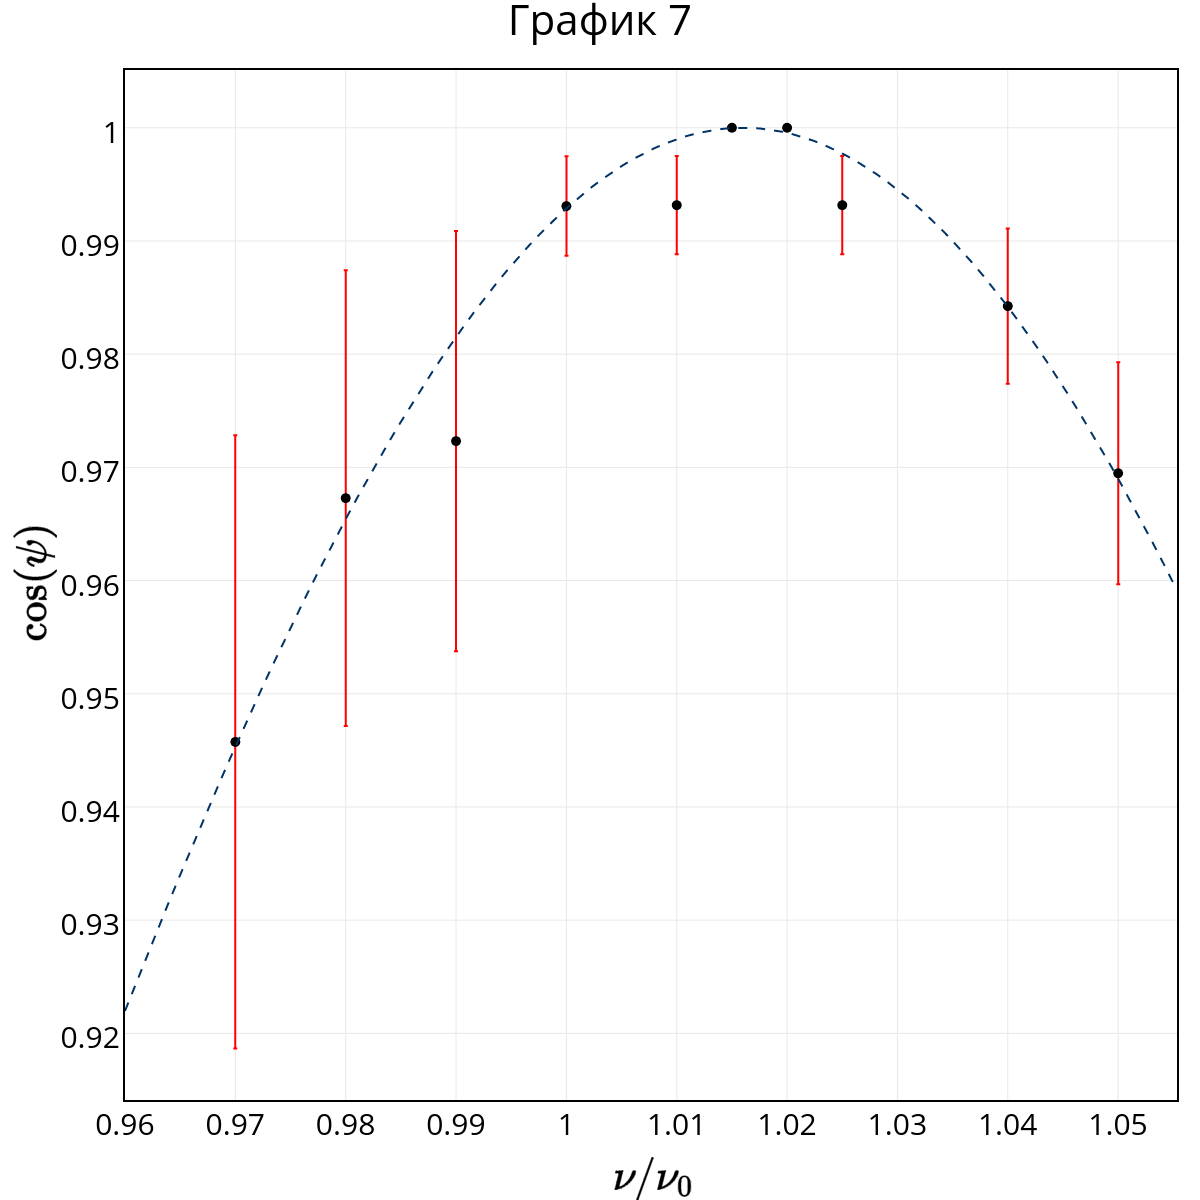

In [31]:
trace1 = go.Scatter(
    y = cos(data4['psi']),
    x = data4['nu_norm'],
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = sin(data4['psi'])*data4['err_psi'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace2 = go.Scatter(
    y = fit_plot_y,
    x = fit_plot_x,
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)

trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    title = "График 7",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$ν / ν_0$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\cos(\psi)$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot7.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot7.png", width=500)